In [1]:
# Tavoitteena tässä on luoda aikasarjamalli Ariman avulla.
# Mallissa hyödynnetty lähteenä An End-to-End Project on Time Series Analysis and Forecasting with Python
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# Tuodaan kirjastot

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Tuodaan data
df = pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx', index_col='Date')
df.head()

,Saapuneet
Date,
2017-12-10,663
2017-12-17,941
2017-12-24,658
2017-12-31,1206
2018-01-07,991


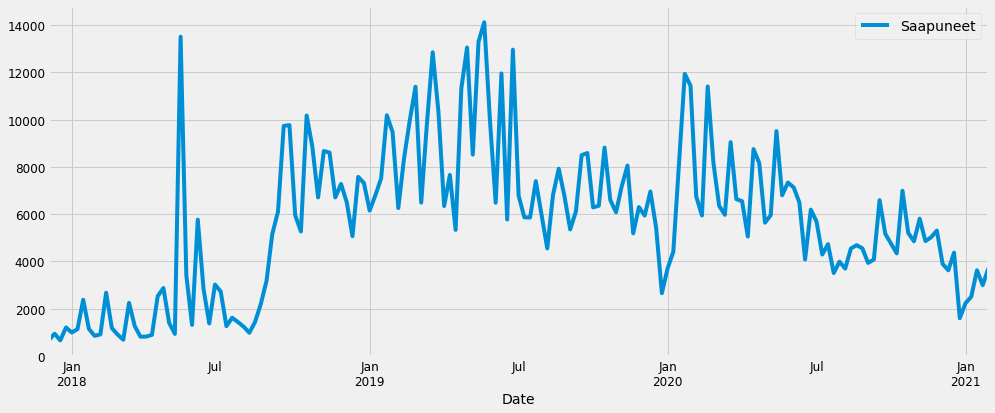

In [3]:
# Visualisoidaan aikasarjadataa
df.plot(figsize=(15, 6))
plt.show()

In [4]:
# Jokaiselle kuukaudelle keskiarvo
y = df['Saapuneet'].resample('M').mean()

In [5]:
# Katsotaan data läpi
y['2017':]

Date
2017-12-31      867.00
2018-01-31     1411.25
2018-02-28     1405.25
2018-03-31     1275.25
2018-04-30     1585.40
2018-05-31     4815.00
2018-06-30     2825.00
2018-07-31     2012.60
2018-08-31     1464.75
2018-09-30     6789.80
2018-10-31     7562.25
2018-11-30     7674.75
2018-12-31     6750.60
2019-01-31     7664.50
2019-02-28     8517.50
2019-03-31    10189.00
2019-04-30     7666.75
2019-05-31    12249.50
2019-06-30     9426.00
2019-07-31     6476.75
2019-08-31     6313.50
2019-09-30     7063.00
2019-10-31     7016.50
2019-11-30     6628.00
2019-12-31     5457.20
2020-01-31     7059.75
2020-02-29     8884.75
2020-03-31     7237.00
2020-04-30     7130.50
2020-05-31     7051.20
2020-06-30     5977.75
2020-07-31     4554.50
2020-08-31     4296.00
2020-09-30     4944.75
2020-10-31     5323.50
2020-11-30     5170.20
2020-12-31     3372.75
2021-01-31     3015.80
Freq: M, Name: Saapuneet, dtype: float64

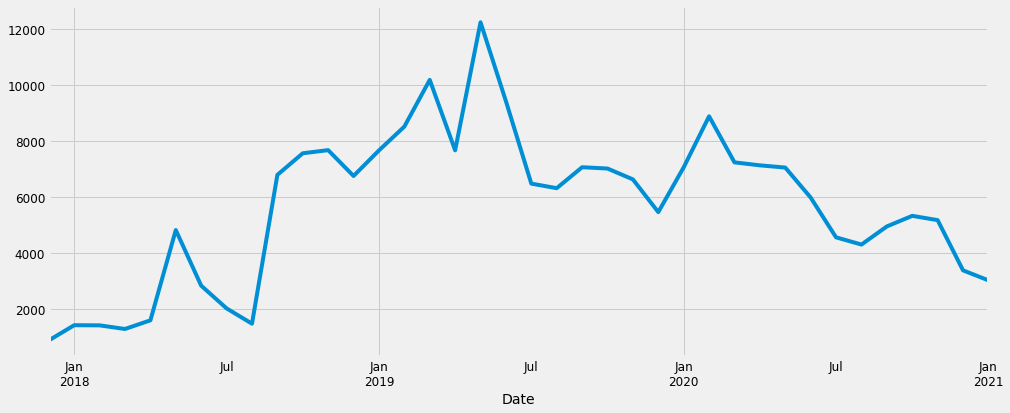

In [6]:
# Visualisoidaan aikasarjadataa keskiarvolla
y.plot(figsize=(15, 6))
plt.show()

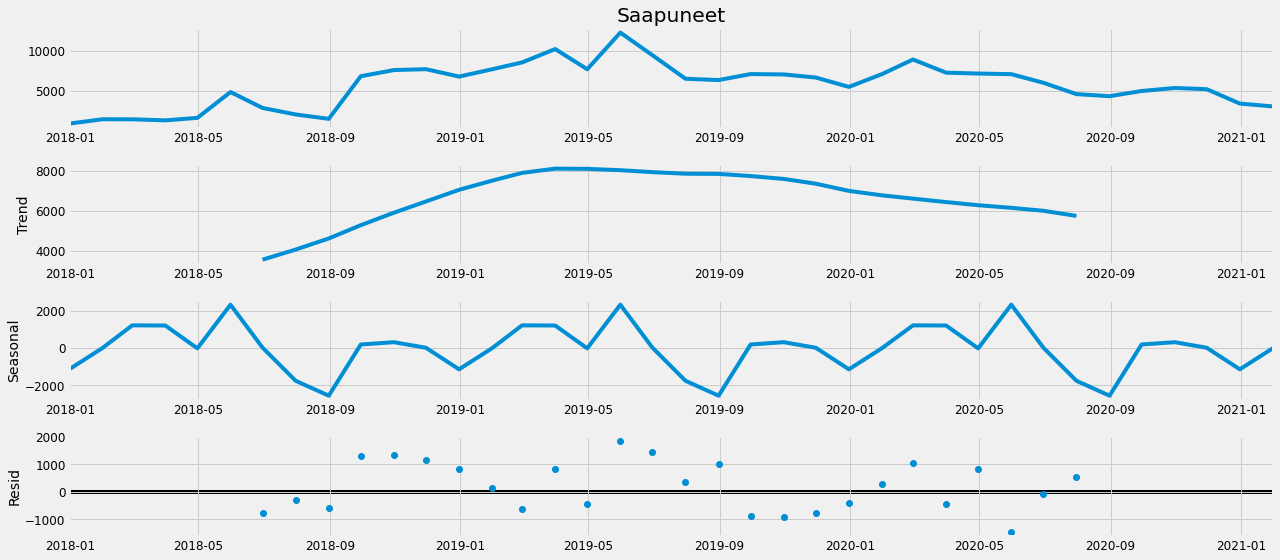

In [7]:
# Visualisoidaan trendi, kausittaisuus ja resid, syklisyys
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
# Luodaan ARIMA-malli Autoregressive Integrated Moving Average
# ARIMA(p, d, q) = seasonality, trend, noise in data
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
# Etsitään sopivat parametrit Arima-mallille
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:755.106484015107


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:858.5452851078763
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:489.92235909104244
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:235.41767810035455
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:511.42288904306497


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:494.03224470246863
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:256.57788353393414
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:232.1494921140336
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:716.0250825854149
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2198.419007607855
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:456.2164615453928


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:217.71718253435515
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:493.1784673646474
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:454.09517197148506
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:255.7285756636621
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:217.61550918274415
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:642.2551908675398
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1152.17324618146
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.68235436965676


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:210.74596350817285
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:438.89585511445955
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:423.3347324945021
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:233.771934781575
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:212.05540741748578
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:625.7309196951069


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1627.6485683038718
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:416.38099507193255
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:194.36325564121324
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:438.3393164894042
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:407.0384495093803
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:233.54262382395058
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:196.10109154734386
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:660.5239801917083


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:888.9634757325648
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:450.8174549055982
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:230.44141229601917
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:439.39655050626845
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:440.4877810342801
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:235.1557284382289
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:232.88036950492585
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:644.2866910247566


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1842.6438897421267
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:433.8521978316443
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:214.09188540615148
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:441.926241796632
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:426.70939179721313
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:235.5230146208175
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:215.9190163940122
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:643.1622485749305


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1052.9924274192176
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:432.54574214378516
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:212.02269137256312
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:421.6021665028991
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:423.2072269544286
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:216.84828429640353
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:213.79960981748636
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:627.111732010179
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1876.7755443709298
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:417.18627540266436
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:196.29709129284183
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:423.60169489728406
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:408.2531253721903
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:218.7070697635665
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:198.03131792406796


In [10]:
# Yllä oleva viitteen, että ARIMA(1, 1, 1)x(1, 1, 1, 12)12 antaa alhaisimman AIC:198.03131792406796.
# Sovitetaan Arima-mallia
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4831      0.783     -0.617      0.537      -2.018       1.052
ma.L1          0.2420      0.933      0.259      0.795      -1.587       2.071
ar.S.L12      -0.0709      0.272     -0.261      0.794      -0.604       0.462
ma.S.L12      -1.0000      0.425     -2.351      0.019      -1.834      -0.166
sigma2      1.482e+06   2.87e-07   5.17e+12      0.000    1.48e+06    1.48e+06


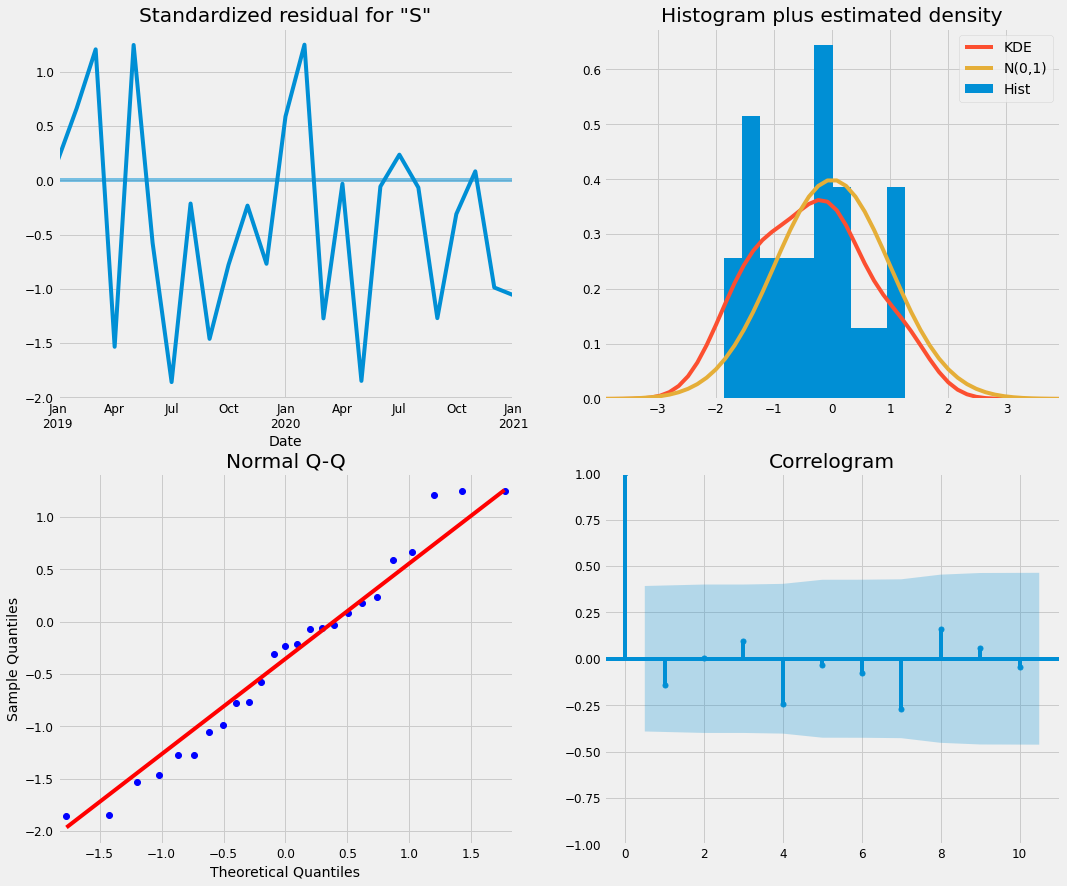

In [11]:
# Plotataan
# Normaalijakauma
results.plot_diagnostics(figsize=(16, 14))
plt.show()

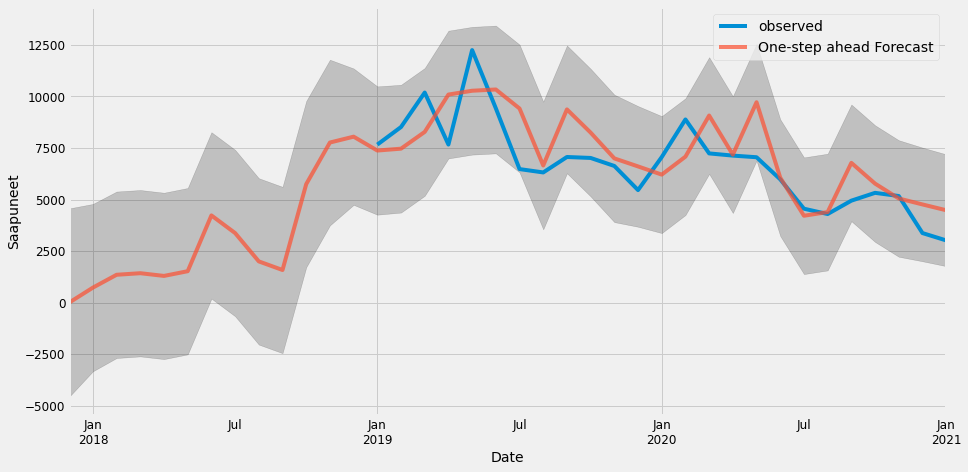

In [12]:
# Validoidaan ennusteet
# Line plot näyttää havainnot verrattuna liukuviin ennusteisiin. Ennusteet ovat linjassa oikeiden arvojen kanssa.
# Trendi nouseva alkuvuonna ja kausittainen loppuvuonna.
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Saapuneet')
plt.legend()
plt.show()

In [13]:
# The smaller the MSE, the closer we are to finding the line of best fit.
y_forecasted = pred.predicted_mean
y_truth = y['2017-12-10':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2714478.73


In [14]:
# Root Mean Square Error (RMSE) kertoo, että malli ennustaa 1647:n sisällä. 
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1647.57


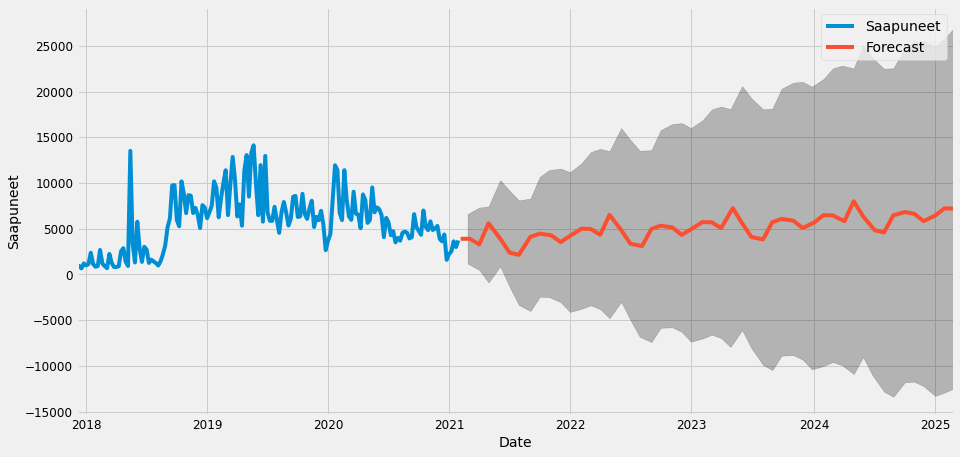

In [15]:
# Arima-malli näyttää kausittaisuuden. Jos ennustus ulottuu kauas tulevaisuuteen, on luontevaa, että luotettavuusrajat kasvavat.
# Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Saapuneet')
plt.legend()
plt.show()